In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
data.shape

(1599, 12)

There are 1599 rows and 12 columns in the dataset, 'quality' column being the target variable.

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are two types of data types in our dataset - float type
 and int type

In [6]:
data.isnull().any().sum()

0

We can say that there are no null values in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The info() method gives the brief information about the dataset such as index range, data columns and dtypes , non null count memory used etc. There are 1599 entries with range 0 to 1598, total 12 columns and all the columns do not have any null values and our dataset has float type and int data type

In [8]:
for i in data.columns:
    print('Column:', i)
    
    print('No of unique values', data[i].nunique())
    print('\n')
    

Column: fixed acidity
No of unique values 96


Column: volatile acidity
No of unique values 143


Column: citric acid
No of unique values 80


Column: residual sugar
No of unique values 91


Column: chlorides
No of unique values 153


Column: free sulfur dioxide
No of unique values 60


Column: total sulfur dioxide
No of unique values 144


Column: density
No of unique values 436


Column: pH
No of unique values 89


Column: sulphates
No of unique values 96


Column: alcohol
No of unique values 65


Column: quality
No of unique values 6




In [9]:
data.nunique().to_frame('no of unique values')

no of unique values
fixed acidity                          96
volatile acidity                      143
citric acid                            80
residual sugar                         91
chlorides                             153
free sulfur dioxide                    60
total sulfur dioxide                  144
density                               436
pH                                     89
sulphates                              96
alcohol                                65
quality                                 6

In [10]:
for i in data:
    print(data[i]. value_counts())
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

In [11]:
data.loc[data.quality == 5].shape

(681, 12)

In [12]:
data.loc[data.quality == 6].shape

(638, 12)

In [13]:
data.loc[data.quality == 7].shape

(199, 12)

In [14]:
data.loc[data.quality == 8].shape


(18, 12)

There are 10 rows of dataset where their quality is 3

There are 53 rows of dataset where their quality is 4

There are 681 rows of dataset where their quality is 5

There are 638 rows of dataset where their quality is 6

There are 199 rows of dataset where their quality is 7

There are 18 rows of dataset where their quality is 8

We can observe that there are more no of wines whose quality score is 5 and 6 and less no of wines who has score of 3,4,7,8 hence we can say that there is class imbalance in the dataset

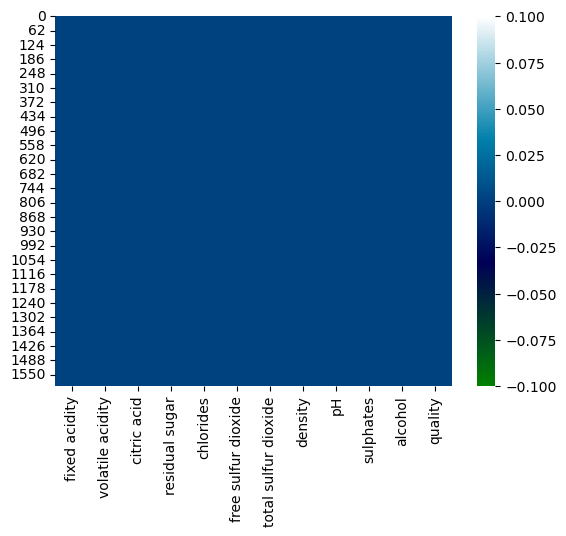

In [15]:
sns.heatmap(data.isnull(), cmap = 'ocean')
plt.show()

In [16]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

The describe() method gives the details of statistical summary of our dataset.

There are no null values in the dataset.

The mean value of fixed acidity, citric acid, residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates and alcohol is greater than the median(50%), hence the data in these columns are right skewed.

There is huge difference between third quantile and max values of fixed acidity,volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol, hence there might be outliers in these columns

There is huge difference between 1st quantile and min values of chloorides, density, and pH, hence there might be outliers in these columns.

We can also see standard deviation, 25 % , min values of each coluumn.




### Data visualisation 

##### Univariate Analysis

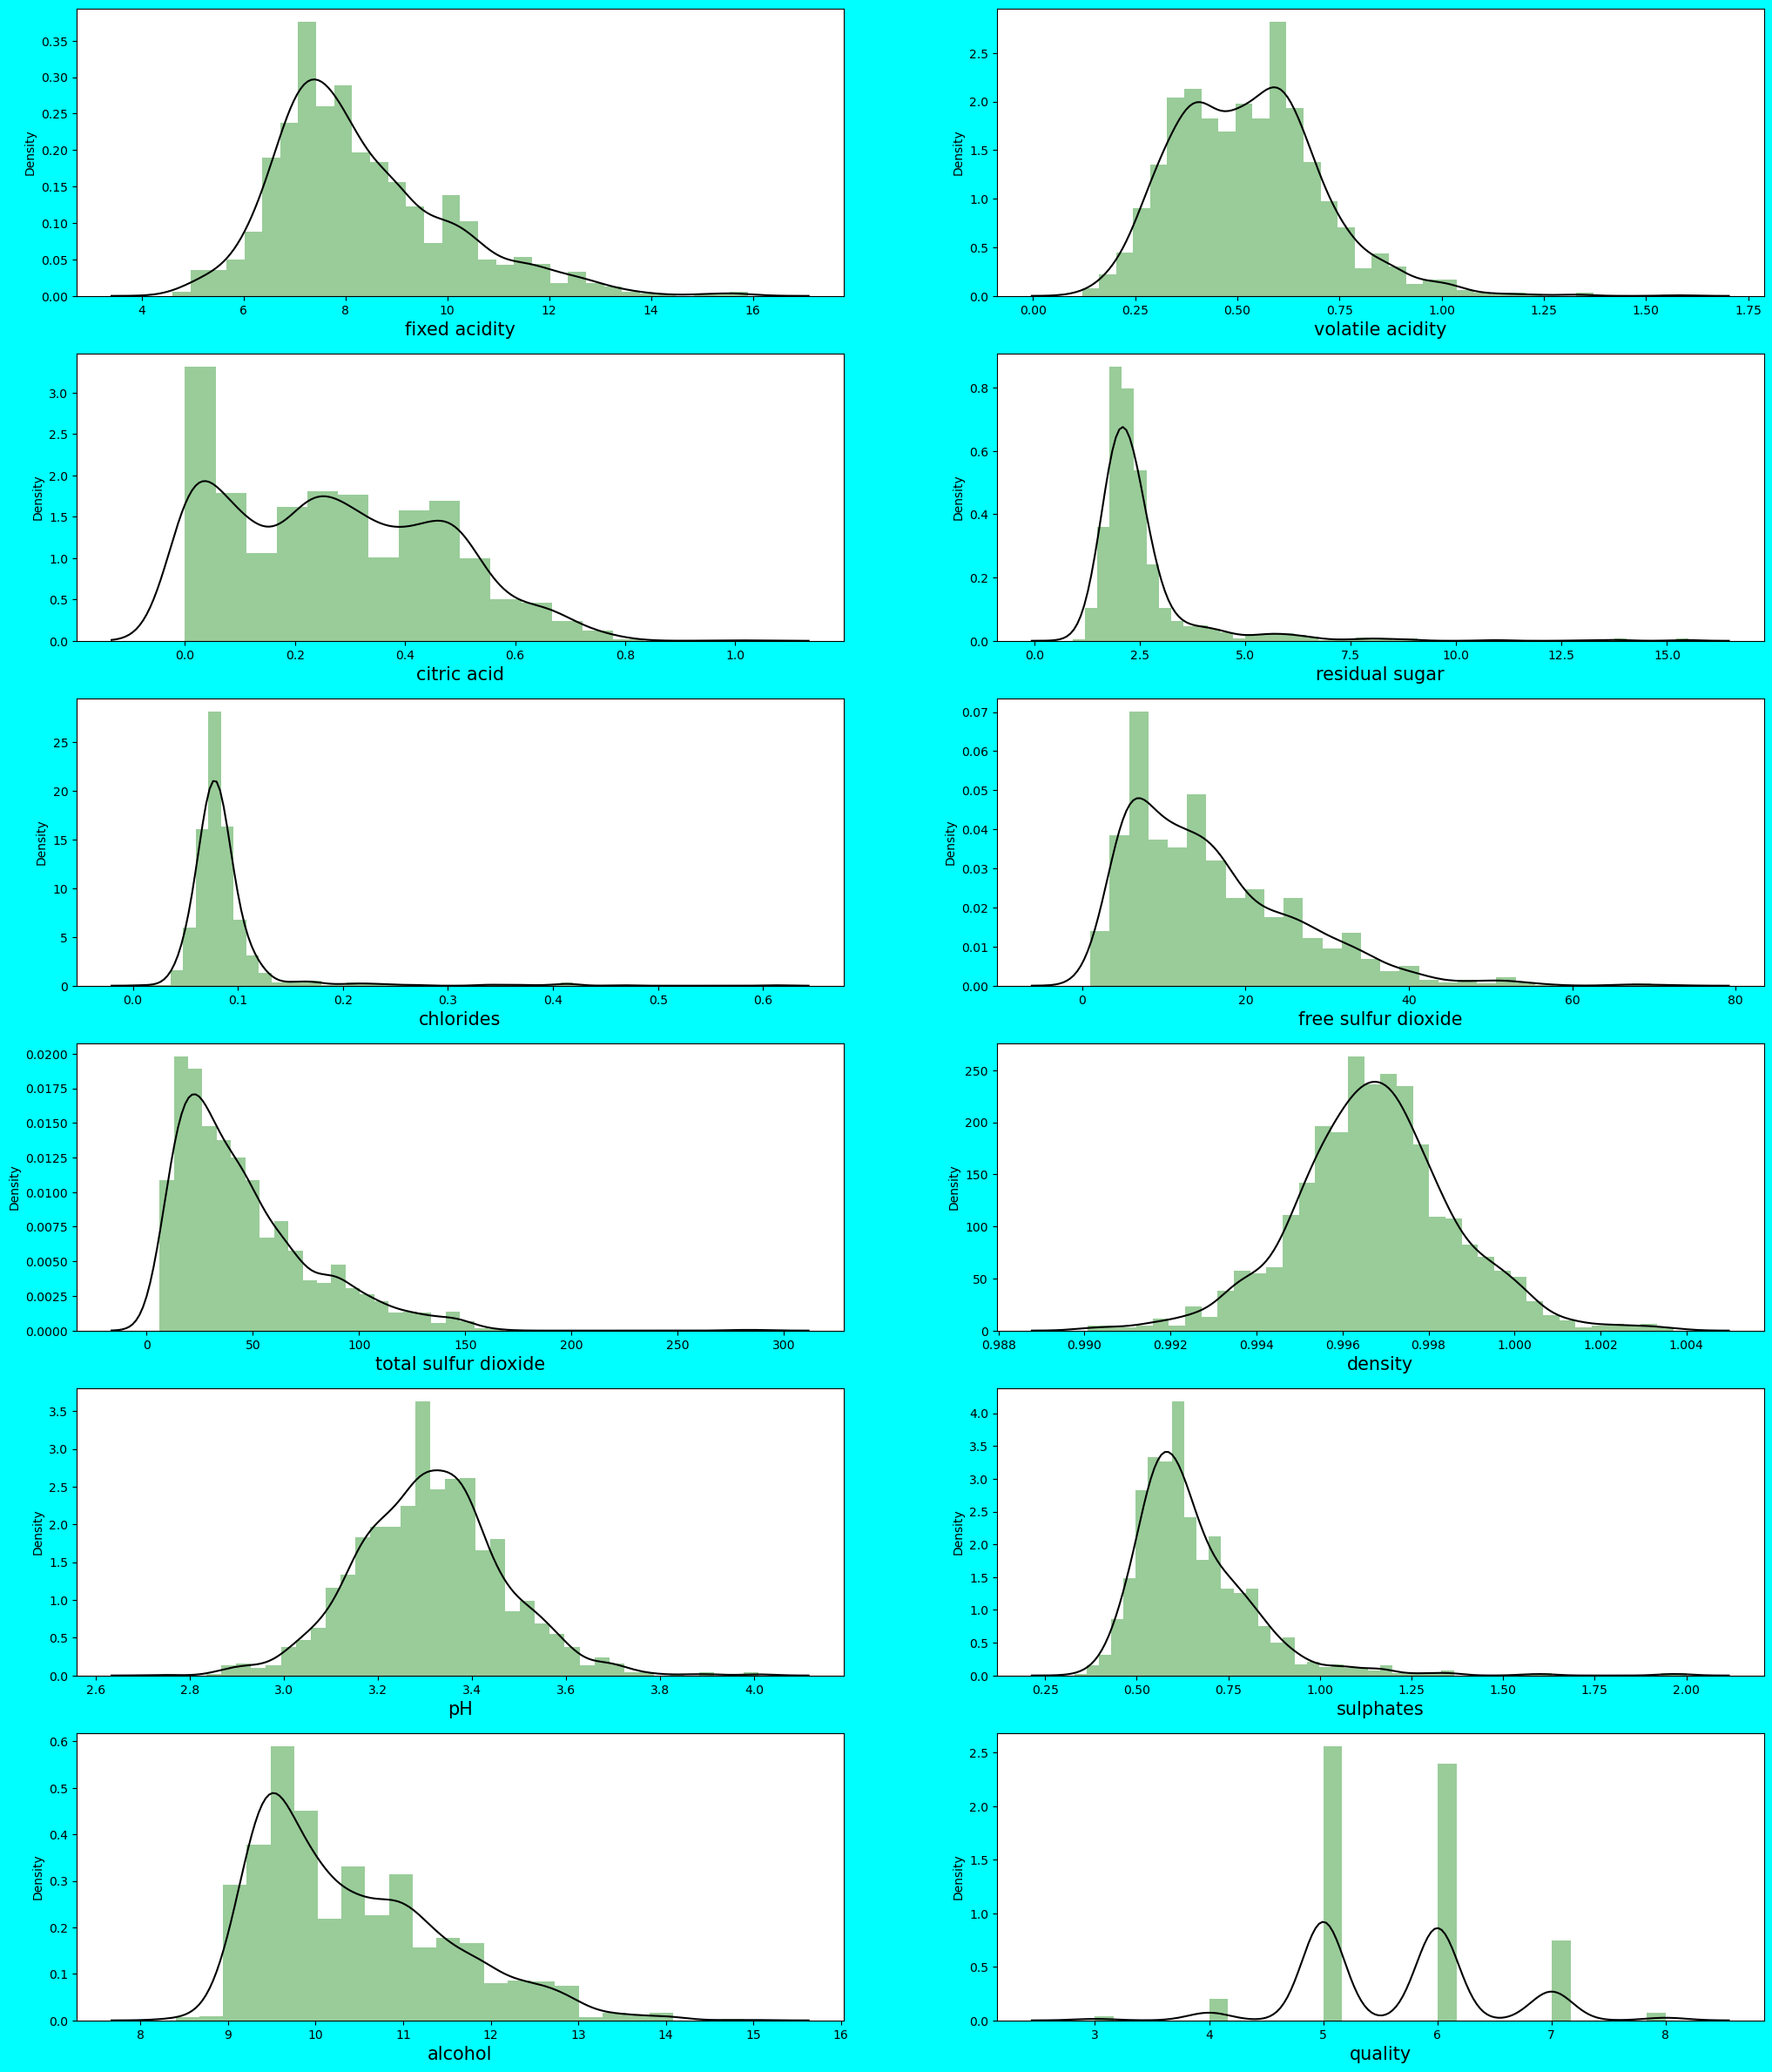

In [17]:
plt.figure(figsize = (25,30), facecolor = 'cyan')
c = 1
for i in data.columns:
    if c<=13:
        plt.subplot(6,2,c)
        sns.distplot(data[i], color = 'green', kde = True, kde_kws = {'color': 'black'})
        plt.xlabel(i, fontsize = 15)
    c+=1
plt.show()   

From the above distplot we can see the columns fixed acidity,fixed acidity, citric acid, residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates and alcohol

#### Bivariate Analysis

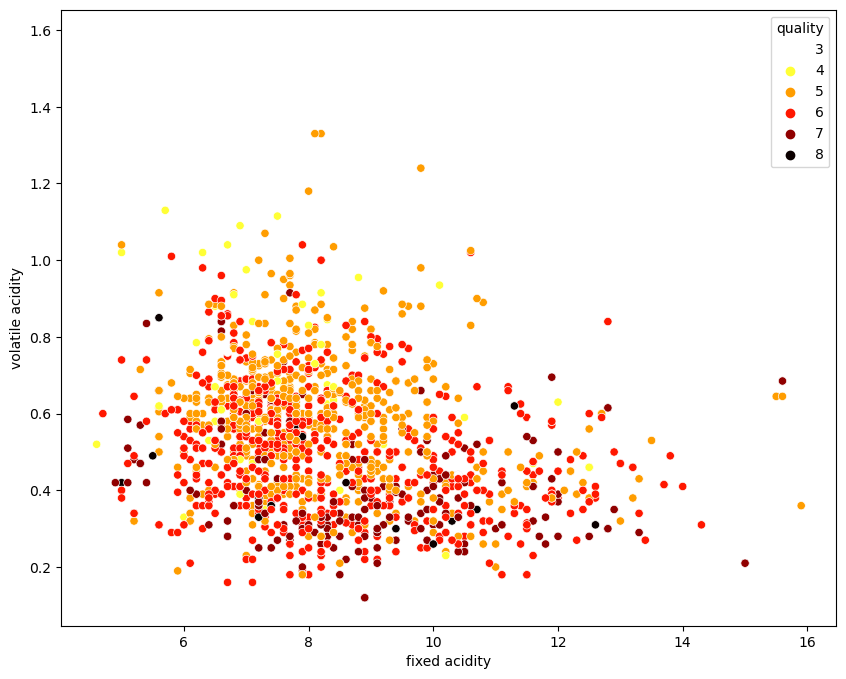

In [18]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'fixed acidity', y = 'volatile acidity', hue = 'quality',data = data, palette = 'hot_r')
plt.show()

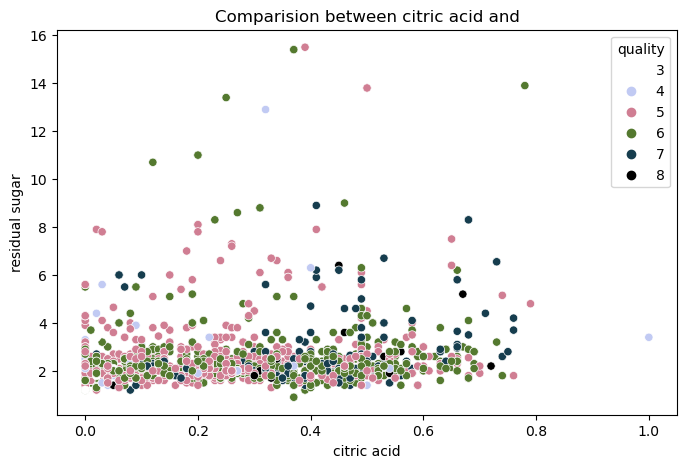

In [19]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'citric acid', y = 'residual sugar', hue = 'quality',data = data, palette = 'cubehelix_r')
plt.title('Comparision between citric acid and')
plt.show()

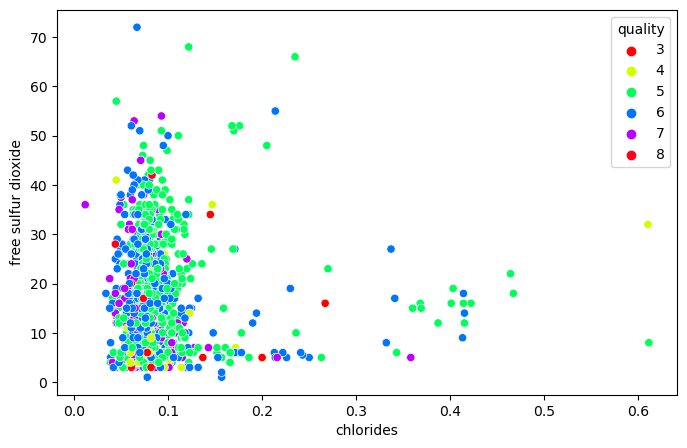

In [20]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'chlorides', y = 'free sulfur dioxide', hue = 'quality',data = data, palette = 'hsv')
plt.show()

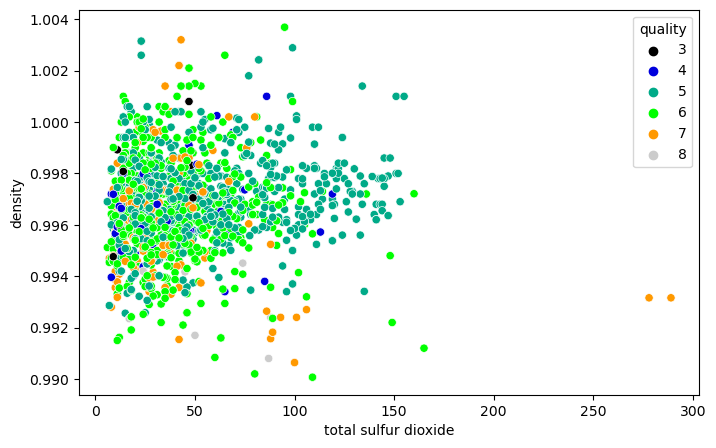

In [21]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'total sulfur dioxide', y = 'density', hue = 'quality',data = data, palette = 'nipy_spectral')
plt.show()

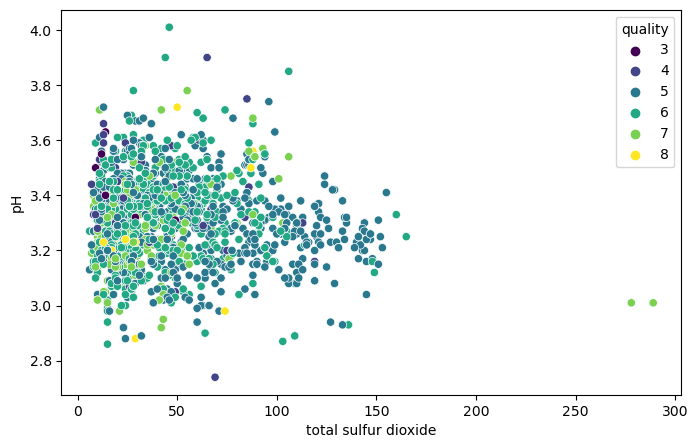

In [22]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'total sulfur dioxide', y = 'pH', hue = 'quality',data = data, palette = 'viridis')
plt.show()

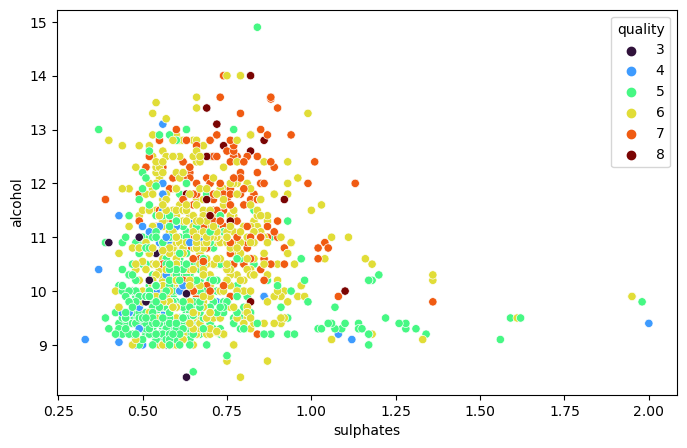

In [23]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'sulphates', y = 'alcohol', hue = 'quality',data = data, palette = 'turbo')
plt.show()

#### Multivariate Analysis

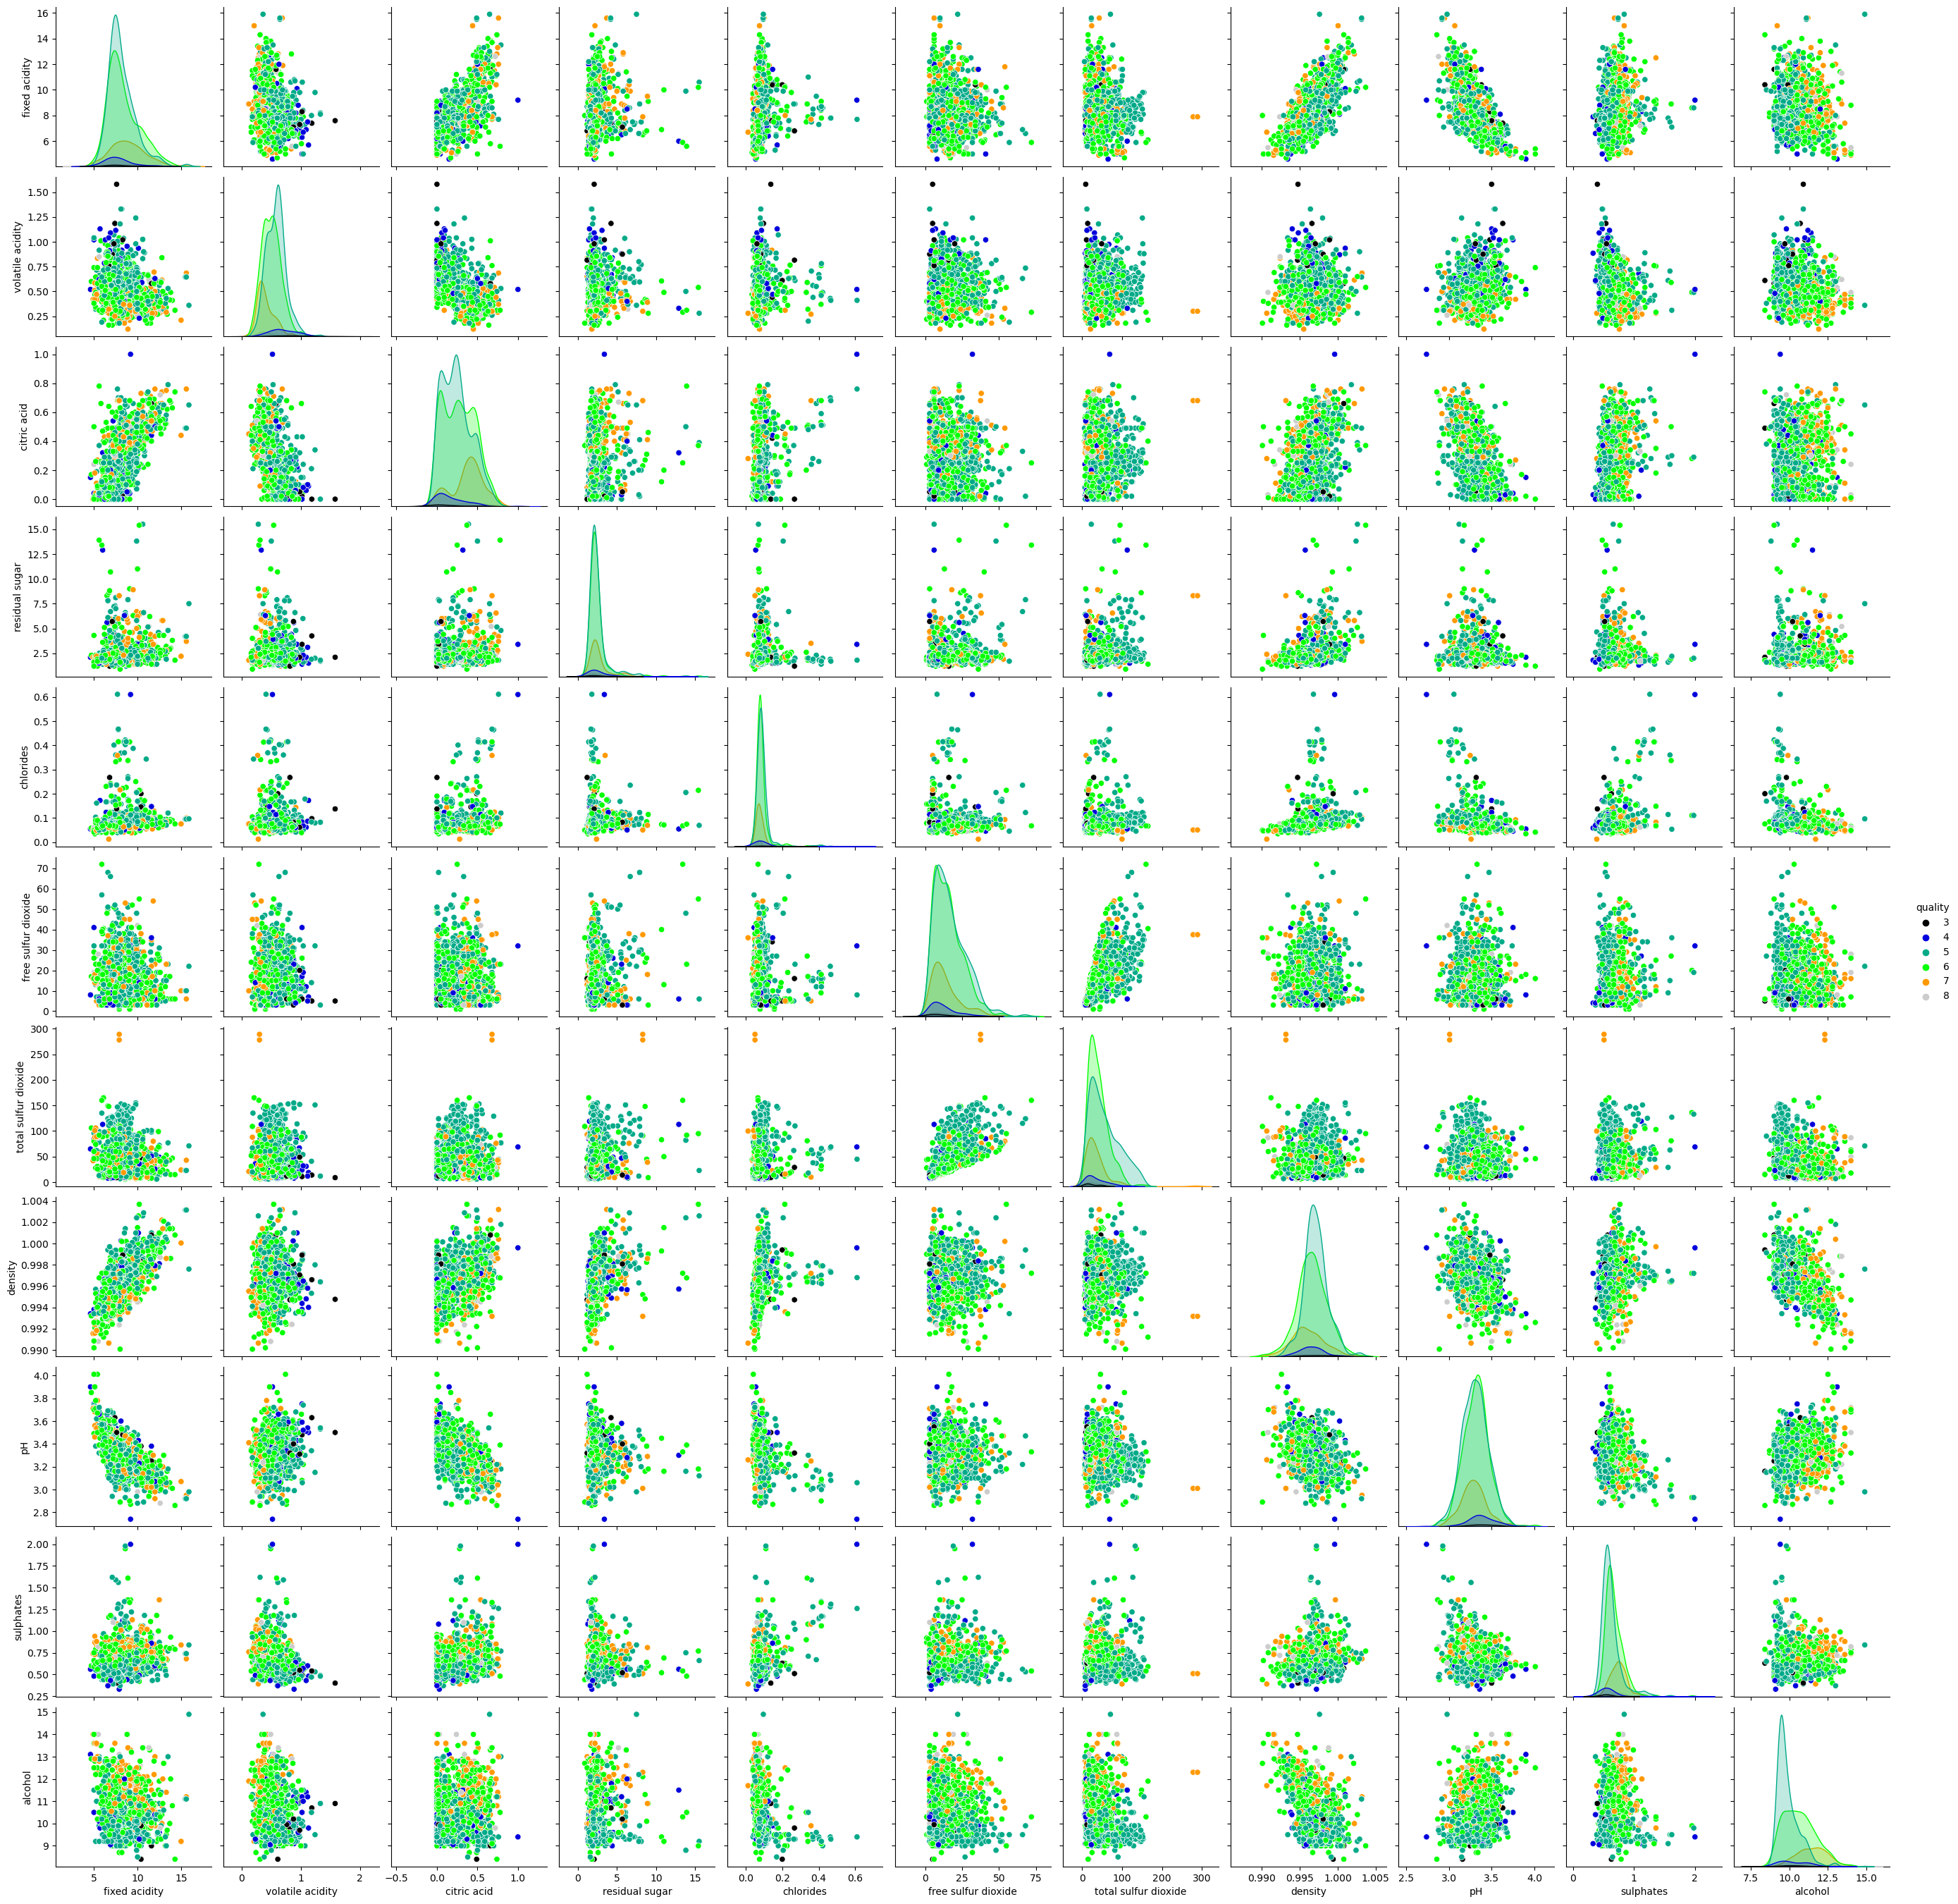

In [24]:
sns.pairplot(data, hue = 'quality', palette = 'nipy_spectral')
plt.show()

#### Checking outliers

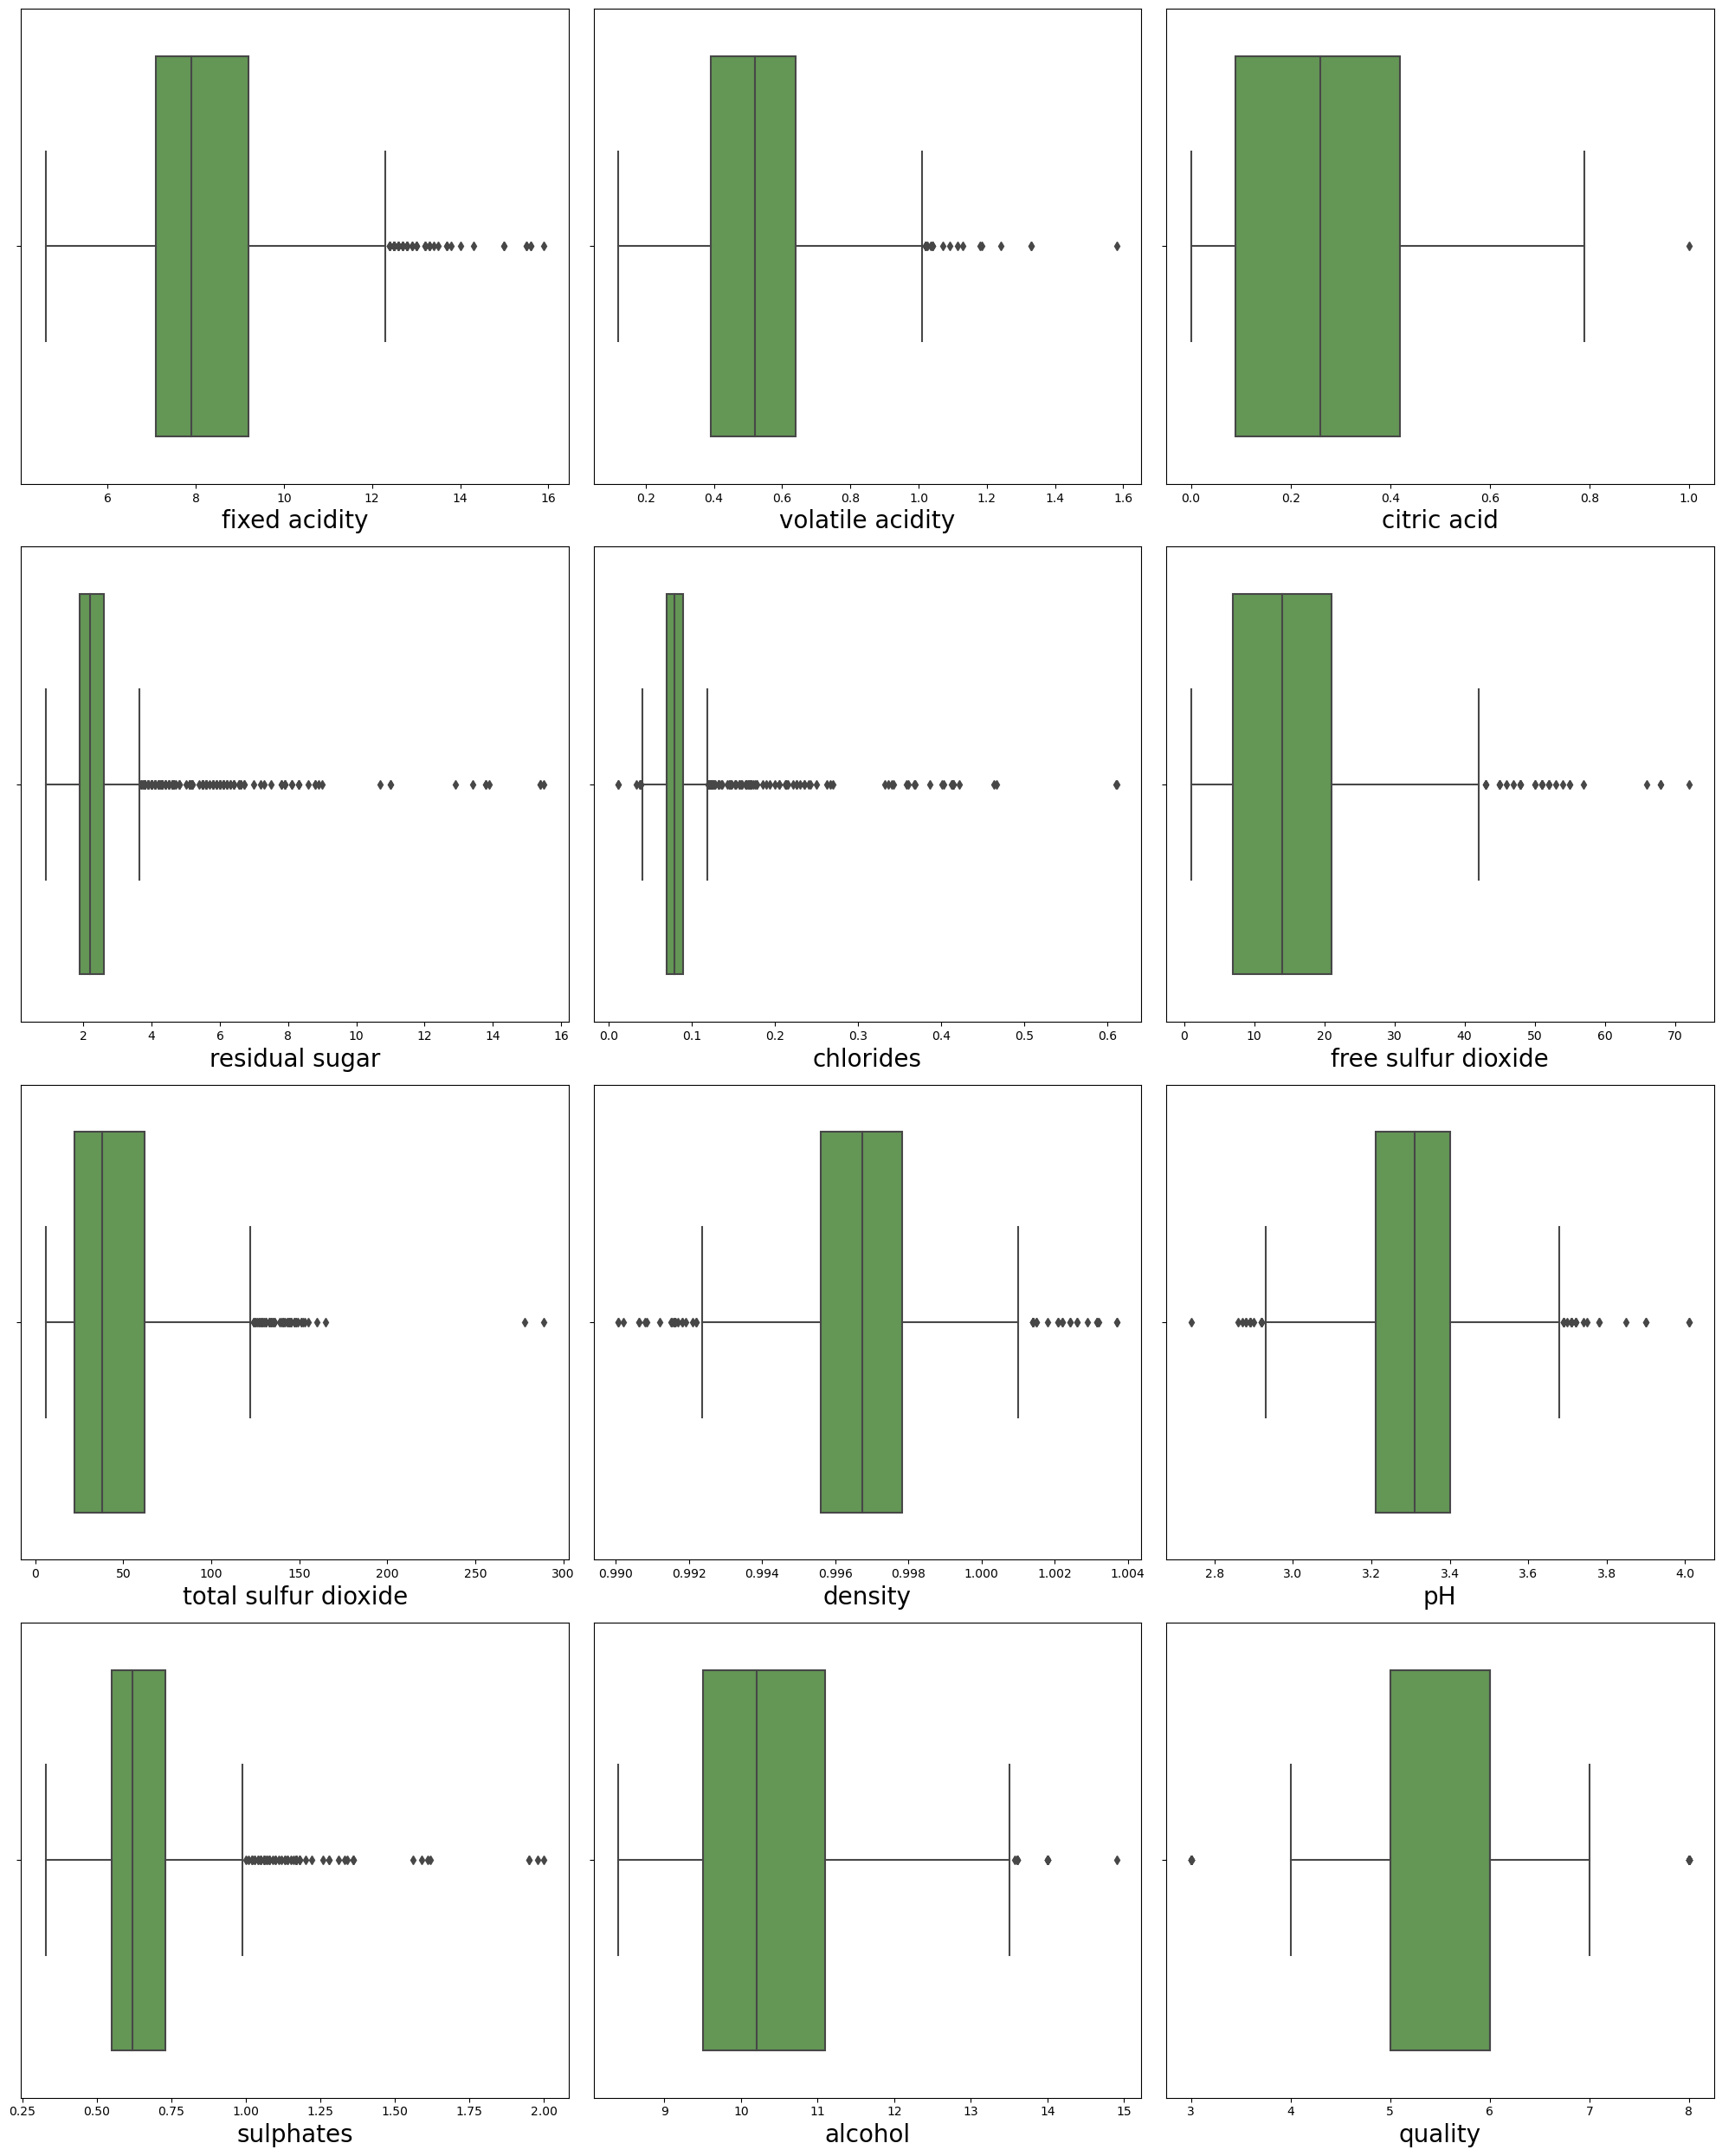

In [25]:
plt.figure(figsize = (20,25))
c= 1
for i in data.columns:
    if c<=13:
        ax = plt.subplot(4,3,c)
        sns.boxplot(data[i], palette = 'gist_earth')
        plt.xlabel(i, fontsize = 20)
        plt.yticks(rotation = 10, fontsize = 10)
    c+=1
plt.tight_layout()

In [26]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

As we observe the above plot and skew data we can see except citric acid,densitty,pH and quality all the other columns are skewed

In [27]:
from scipy.stats import zscore
features = data[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']]
z = np.abs(zscore(features))
z

fixed acidity  volatile acidity  residual sugar  chlorides  \
0          0.528360          0.961877        0.453218   0.243707   
1          0.298547          1.967442        0.043416   0.223875   
2          0.298547          1.297065        0.169427   0.096353   
3          1.654856          1.384443        0.453218   0.264960   
4          0.528360          0.961877        0.453218   0.243707   
...             ...               ...             ...        ...   
1594       1.217796          0.403229        0.382271   0.053845   
1595       1.390155          0.123905        0.240375   0.541259   
1596       1.160343          0.099554        0.169427   0.243707   
1597       1.390155          0.654620        0.382271   0.264960   
1598       1.332702          1.216849        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide  sulphates   alcohol  
0                0.466193              0.379133   0.579207  0.960246  
1                0.872638              0.624363   0.128950  0.584777  
2                0.083669              0.229047   0.048089  0.584777  
3                0.107592              0.411500   0.461180  0.584777  
4                0.466193              0.379133   0.579207  0.960246  
...                   ...                   ...        ...       ...  
1594             1.542054              0.075043   0.461180  0.072294  
1595             2.211469              0.137820   0.601055  0.729364  
1596             1.255161              0.196679   0.542042  0.541630  
1597             1.542054              0.075043   0.305990  0.209308  
1598             0.203223              0.135861   0.010924  0.541630  

[1599 rows x 8 columns]

In [28]:
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          57,   81,   81,   83,   86,   88,   91,   92,  106,  106,  109,
         120,  126,  127,  142,  144,  147,  151,  151,  163,  164,  169,
         169,  181,  199,  226,  226,  240,  243,  244,  258,  258,  274,
         281,  291,  324,  325,  339,  340,  347,  354,  374,  381,  391,
         396,  396,  400,  400,  442,  451,  467,  480,  494,  515,  544,
         554,  555,  557,  568,  584,  588,  591,  595,  614,  636,  639,
         649,  649,  651,  652,  652,  652,  672,  672,  684,  690,  692,
         692,  723,  724,  730,  754,  776,  777,  795,  821,  911,  917,
         923,  925,  926,  982, 1043, 1051, 1051, 1071, 1074, 1079, 1079,
        1081, 1081, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244,
        1244, 1260, 1269, 1270, 1288, 1289, 1295, 1296, 1299, 1312, 1319,
        1319, 1358, 1367, 1370, 1370, 1372, 1372, 1374, 1434, 1434, 1435,
        1435, 1474, 1474, 1476, 1476, 

In [29]:
# removing all the zscores greater than 3
wine = data[(z<3).all(axis=1)]
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1472 rows x 12 columns]

In [30]:
cor = wine.corr()

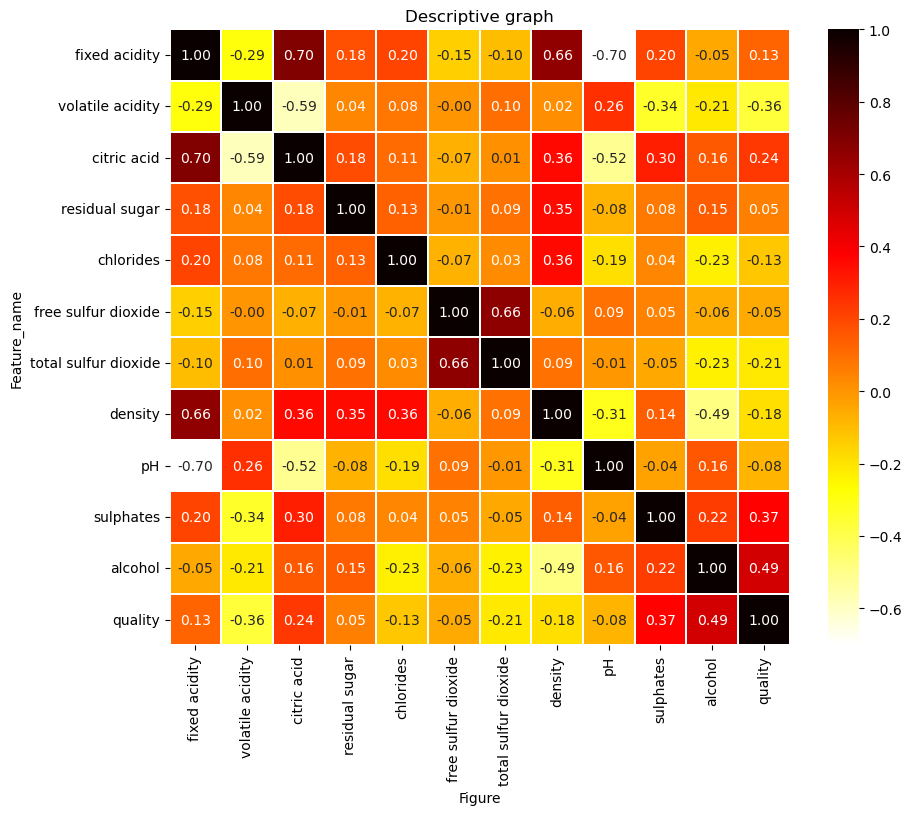

In [31]:
plt.figure(figsize = (10,8))
sns.heatmap(wine.corr(), annot = True, fmt = '0.2f', linewidth = 0.3,  cmap = 'hot_r')
plt.xlabel('Figure')
plt.ylabel('Feature_name')
plt.title('Descriptive graph')
plt.show()

In [32]:
cor['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.492741
sulphates               0.371025
citric acid             0.236078
fixed acidity           0.128310
residual sugar          0.049424
free sulfur dioxide    -0.054396
pH                     -0.078552
chlorides              -0.127240
density                -0.183641
total sulfur dioxide   -0.214207
volatile acidity       -0.363484
Name: quality, dtype: float64

Text(0.5, 1.0, 'Correlation between label and features using barplot')

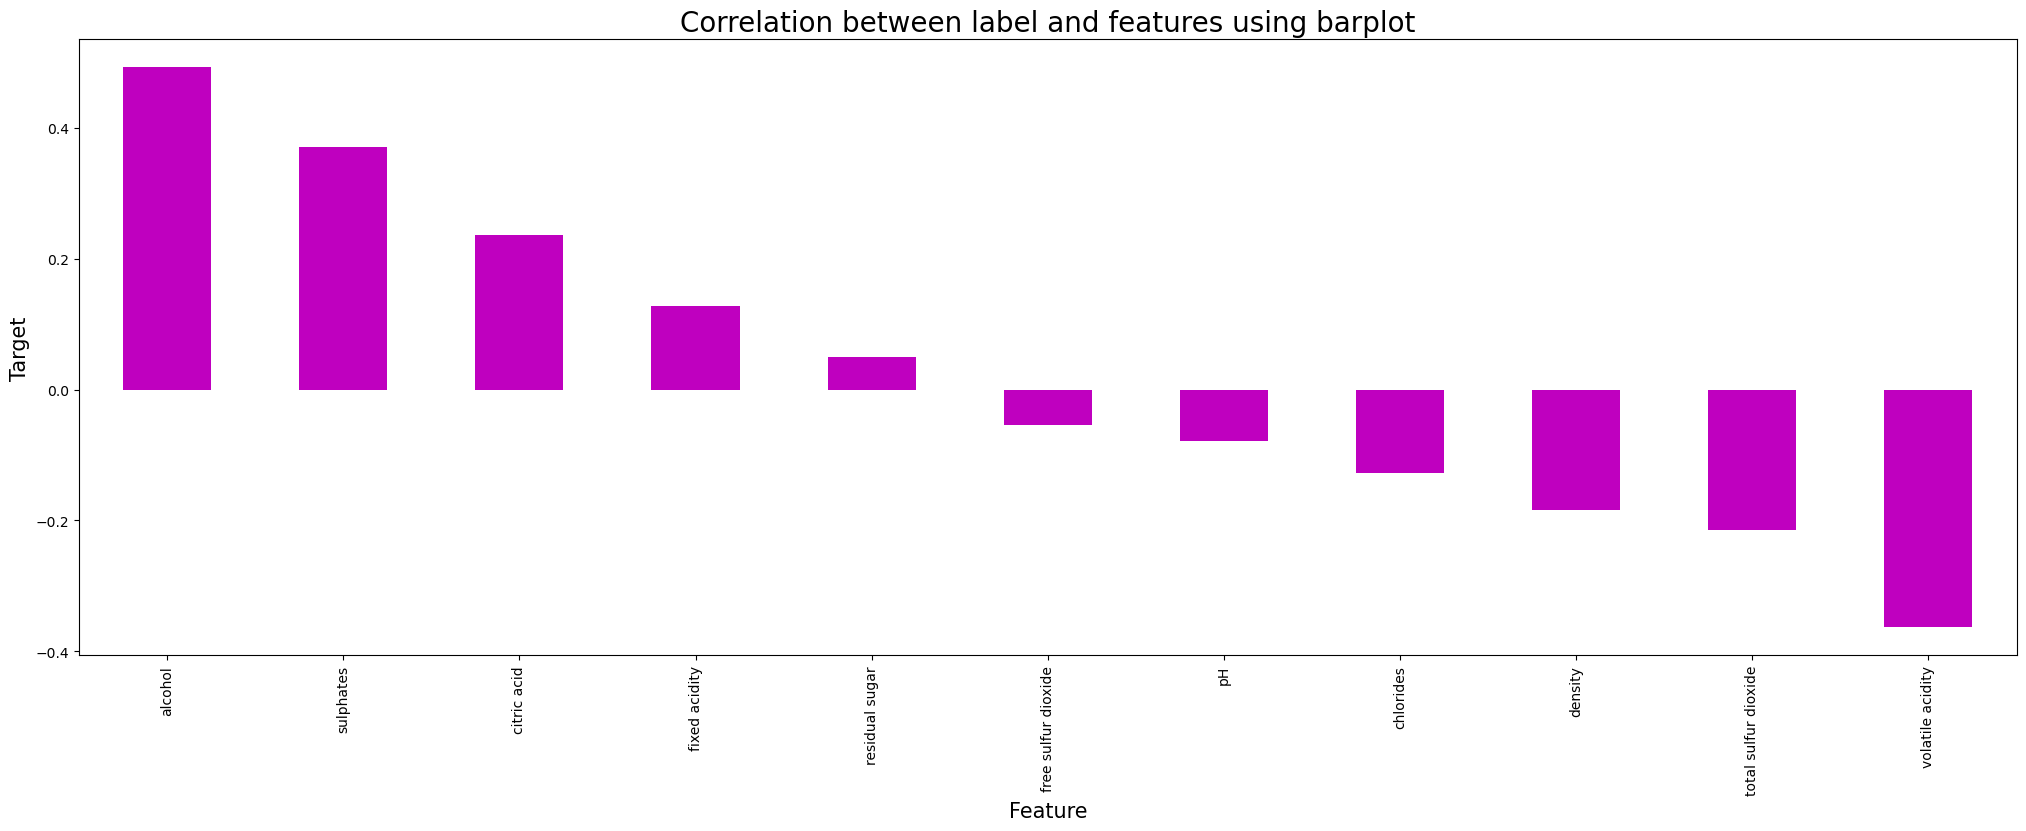

In [33]:
plt.figure(figsize = (25,8))
wine.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind = 'bar', color = 'm')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)

In [34]:
# Create Classification version of target variable
wine['good'] = [1 if x >= 7 else 0 for x in wine['quality']]
x = wine.drop(['quality','good'], axis = 1)
y = wine['good']

In [35]:
x.shape

(1472, 11)

In [36]:
y.shape

(1472,)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.539270          1.036924    -1.386906       -0.559276  -0.246653   
1         -0.298266          2.096360    -1.386906        0.240222   0.778714   
2         -0.298266          1.390069    -1.177465       -0.102420   0.499069   
3          1.750262         -1.435092     1.545267       -0.559276  -0.293261   
4         -0.539270          1.036924    -1.386906       -0.559276  -0.246653   
...             ...               ...          ...             ...        ...   
1467      -1.262280          0.448349    -0.968024       -0.445062   0.405853   
1468      -1.443032          0.154061    -0.863304       -0.216634  -0.899160   
1469      -1.202029         -0.081369    -0.706223       -0.102420  -0.246653   
1470      -1.443032          0.713208    -0.758583       -0.445062  -0.293261   
1471      -1.382781         -1.258520     1.074025        1.382360  -0.666122   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.445405             -0.337107  0.624442  1.305402   
1                1.052214              0.779822  0.062762 -0.805370   
2               -0.017514              0.339820  0.175098 -0.396834   
3                0.196432              0.542898  0.736779 -1.077728   
4               -0.445405             -0.337107  0.624442  1.305402   
...                   ...                   ...       ...       ...   
1467             1.801024              0.001357 -1.004432  0.896865   
1468             2.549834              0.238281 -0.880862  1.373491   
1469             1.480105             -0.134029 -0.532620  0.692597   
1470             1.801024              0.001357 -0.684274  1.713938   
1471             0.303405             -0.066336 -0.673040  0.488329   

      sulphates   alcohol  
0     -0.629515 -0.998374  
1      0.295820 -0.612410  
2      0.064486 -0.612410  
3     -0.475292 -0.612410  
4     -0.629515 -0.998374  
...         ...       ...  
1467  -0.475292  0.063027  
1468   0.912710  0.738464  
1469   0.835599  0.545482  
1470   0.527154 -0.226446  
1471   0.141598  0.545482  

[1472 rows x 11 columns]

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values              Features
0     7.897380         fixed acidity
1     1.879116      volatile acidity
2     3.197934           citric acid
3     1.674239        residual sugar
4     1.200034             chlorides
5     1.945876   free sulfur dioxide
6     2.169067  total sulfur dioxide
7     6.652057               density
8     3.224474                    pH
9     1.308991             sulphates
10    3.295602               alcohol

In [40]:
x.drop("fixed acidity",axis = 1, inplace = True)

In [41]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values              Features
0    1.874122      volatile acidity
1    2.828698           citric acid
2    1.437528        residual sugar
3    1.177293             chlorides
4    1.932213   free sulfur dioxide
5    2.079559  total sulfur dioxide
6    2.728185               density
7    1.523658                    pH
8    1.296683             sulphates
9    2.353220               alcohol

In [42]:
y.value_counts()

0    1268
1     204
Name: good, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [44]:
y.value_counts()

0    1268
1    1268
Name: good, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    accu = accuracy_score(y_test, pred)
    if accu>maxAccu:
        maxAccu = accu
        maxRs =i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.9632063074901446 at random_state 97


In [46]:
#Creating train test split at maxRs
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [47]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import  cross_val_score

In [48]:
# Checking accuracy score for RandomForestClassifier
rs = RandomForestClassifier()
rs.fit(x_train,y_train)
predc = rs.predict(x_test)
print((accuracy_score(y_test,predc))*100)
print(confusion_matrix(y_test, predc))
print(classification_report(y_test,predc))

95.13797634691196
[[363  26]
 [ 11 361]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       389
           1       0.93      0.97      0.95       372

    accuracy                           0.95       761
   macro avg       0.95      0.95      0.95       761
weighted avg       0.95      0.95      0.95       761



In [49]:
#Checking accuracy score for logisticregression
ls = LogisticRegression()
ls.fit(x_train,y_train)
predd = ls.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.8173455978975033
[[311  78]
 [ 61 311]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       389
           1       0.80      0.84      0.82       372

    accuracy                           0.82       761
   macro avg       0.82      0.82      0.82       761
weighted avg       0.82      0.82      0.82       761



In [50]:
sv = SVC()
sv.fit(x_train,y_train)
predd = sv.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.8843626806833115
[[329  60]
 [ 28 344]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       389
           1       0.85      0.92      0.89       372

    accuracy                           0.88       761
   macro avg       0.89      0.89      0.88       761
weighted avg       0.89      0.88      0.88       761



In [51]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
predd = gd.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.926412614980289
[[353  36]
 [ 20 352]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       389
           1       0.91      0.95      0.93       372

    accuracy                           0.93       761
   macro avg       0.93      0.93      0.93       761
weighted avg       0.93      0.93      0.93       761



In [52]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
predd = ad.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.8567674113009198
[[321  68]
 [ 41 331]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.85       389
           1       0.83      0.89      0.86       372

    accuracy                           0.86       761
   macro avg       0.86      0.86      0.86       761
weighted avg       0.86      0.86      0.86       761



In [53]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)
predd = bg.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.9395532194480947
[[367  22]
 [ 24 348]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       389
           1       0.94      0.94      0.94       372

    accuracy                           0.94       761
   macro avg       0.94      0.94      0.94       761
weighted avg       0.94      0.94      0.94       761



In [54]:
ex = ExtraTreesClassifier()
ex.fit(x_train,y_train)
predd = ex.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.9645203679369251
[[365  24]
 [  3 369]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       389
           1       0.94      0.99      0.96       372

    accuracy                           0.96       761
   macro avg       0.97      0.97      0.96       761
weighted avg       0.97      0.96      0.96       761



In [55]:
score = cross_val_score(rs,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.95866142 0.90138067 0.93293886 0.84812623 0.92110454]
0.9124423426361645
Difference between Accuracy Score and cross validation score is -  0.03893742083295504


In [56]:
# cross validation score for Logistic Regression
score = cross_val_score(ls, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.87204724 0.77514793 0.83234714 0.72781065 0.79684418]
0.8008394290950317
Difference between Accuracy Score and cross validation score is -  0.15054033437408787


In [57]:
# cross validation score for Support Vector Machine
score = cross_val_score(sv, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.93110236 0.82642998 0.89349112 0.80078895 0.85798817]
0.861960117411359
Difference between Accuracy Score and cross validation score is -  0.08941964605776054


In [58]:
# cross validation score for GradientBoosting Classifier
score = cross_val_score(gd, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.90551181 0.85996055 0.8974359  0.81656805 0.86982249]
0.8698597586544284
Difference between Accuracy Score and cross validation score is -  0.08152000481469113


In [59]:
# cross validation score for Ada Boost Classifier
score = cross_val_score(ad, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.89173228 0.82051282 0.86982249 0.78500986 0.83037475]
0.8394904409138206
Difference between Accuracy Score and cross validation score is -  0.11188932255529893


In [60]:
# cross validation score for Bagging Classifier
score = cross_val_score(bg, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.93897638 0.88560158 0.92504931 0.86587771 0.89349112]
0.9017992203637266
Difference between Accuracy Score and cross validation score is -  0.04958054310539295


In [61]:
# cross validation score for Extra Tree Classifier
score = cross_val_score(ex, x, y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and cross validation score is - ",accuracy_score(y_test, predc)-score.mean())

[0.97440945 0.9112426  0.95266272 0.88954635 0.93885602]
0.9333434282253179
Difference between Accuracy Score and cross validation score is -  0.01803633524380166


By evaluating the cross validation scores for all the classification algorithm we conclude that Extra Trees Classifier is the best algorithm since the differnece between accuracy score and validation score is least

Hyper Parameter Tuning : It improvises the score of the model GridSearch Cv is one such method. It is madatory to apply hypertuning method to the model

In [62]:
# Each classification algorithm is having different parameters for gridsearch cv
# Extra Tree Classifier
from sklearn.model_selection import GridSearchCV

param = {'criterion': ['gini', 'entropy'],
               'random_state': [15,25,100],
               'max_depth': [0,10,15,20],
               'max_features': ['sqrt','log'],  
               'n_estimators': [50,100,200,300]}

In [63]:
gcv = GridSearchCV(ExtraTreesClassifier(), param, cv = 5)


In [64]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 15, 20],
                         'max_features': ['sqrt', 'log'],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [15, 25, 100]})

In [65]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 15}

In [66]:
Final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 20, max_features = 'sqrt',n_estimators = 50, random_state = 100)
Final_model.fit(x_train,y_train)
predict = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

49.01445466491459


In [67]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Telecom_Customer_Churn_Analysis.pkl")


['Telecom_Customer_Churn_Analysis.pkl']

In [68]:
#predicting the saved model
model = joblib.load("Telecom_Customer_Churn_Analysis.pkl")

#prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [69]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a

In [70]:
df

Predicted  Original
0            1         1
1            1         1
2            0         0
3            1         1
4            0         0
..         ...       ...
756          1         0
757          0         0
758          1         1
759          1         0
760          1         1

[761 rows x 2 columns]